In [11]:
import scanpy as sc
import numpy as np
import seaborn as sns

In [7]:
adata = sc.read_h5ad("data/pbmc10k_eda.h5ad")
adata

AnnData object with n_obs × n_vars = 10126 × 264916
    obs: 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc', 'sample_id', 'barcode_rank', 'total_fragments_count', 'log10_total_fragments_count', 'unique_fragments_count', 'log10_unique_fragments_count', 'total_fragments_in_peaks_count', 'log10_total_fragments_in_peaks_count', 'unique_fragments_in_peaks_count', 'log10_unique_fragments_in_peaks_count', 'fraction_of_fragments_in_peaks', 'duplication_count', 'duplication_ratio', 'nucleosome_signal', 'tss_enrichment', 'pdf_values_for_tss_enrichment', 'pdf_values_for_fraction_of_fragments_in_peaks', 'pdf_values_for_duplication_ratio', 'barcode', 'n_features_per_cell', 'total_fragment_counts', 'leiden'
    var: 'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc', 'n_cells_per_feature', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'leiden', 'leiden_colors', 'lsi', 'nei

In [5]:
adata_peaks = sc.read_h5ad("data/pbmc10k_peaks_eda.h5ad")
adata_peaks

AnnData object with n_obs × n_vars = 264916 × 10126
    obs: 'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc', 'n_cells_per_feature', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'leiden'
    var: 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc', 'sample_id', 'barcode_rank', 'total_fragments_count', 'log10_total_fragments_count', 'unique_fragments_count', 'log10_unique_fragments_count', 'total_fragments_in_peaks_count', 'log10_total_fragments_in_peaks_count', 'unique_fragments_in_peaks_count', 'log10_unique_fragments_in_peaks_count', 'fraction_of_fragments_in_peaks', 'duplication_count', 'duplication_ratio', 'nucleosome_signal', 'tss_enrichment', 'pdf_values_for_tss_enrichment', 'pdf_values_for_fraction_of_fragments_in_peaks', 'pdf_values_for_duplication_ratio', 'barcode', 'n_features_per_cell', 'total_fragment_counts', 'leiden'
    uns: 'Chromosome_colors', 'leiden

In [2]:
embedding = np.load("data/peak2vec_epoch_norm_128_2000_0.2_0.5.npy")
embedding.shape

(264916, 128)

In [6]:
adata_peaks.obsm["peak2vec"] = embedding
adata_peaks

AnnData object with n_obs × n_vars = 264916 × 10126
    obs: 'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc', 'n_cells_per_feature', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'leiden'
    var: 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc', 'sample_id', 'barcode_rank', 'total_fragments_count', 'log10_total_fragments_count', 'unique_fragments_count', 'log10_unique_fragments_count', 'total_fragments_in_peaks_count', 'log10_total_fragments_in_peaks_count', 'unique_fragments_in_peaks_count', 'log10_unique_fragments_in_peaks_count', 'fraction_of_fragments_in_peaks', 'duplication_count', 'duplication_ratio', 'nucleosome_signal', 'tss_enrichment', 'pdf_values_for_tss_enrichment', 'pdf_values_for_fraction_of_fragments_in_peaks', 'pdf_values_for_duplication_ratio', 'barcode', 'n_features_per_cell', 'total_fragment_counts', 'leiden'
    uns: 'Chromosome_colors', 'leiden

In [13]:
# Find neighbors
sc.pp.neighbors(adata_peaks, use_rep="peak2vec", n_neighbors=10, n_pcs=30, metric="cosine")

# Calculate clusters
sc.tl.leiden(adata_peaks, flavor="igraph", n_iterations=2)

# Calculate UMAP
sc.tl.umap(adata_peaks, random_state=4)

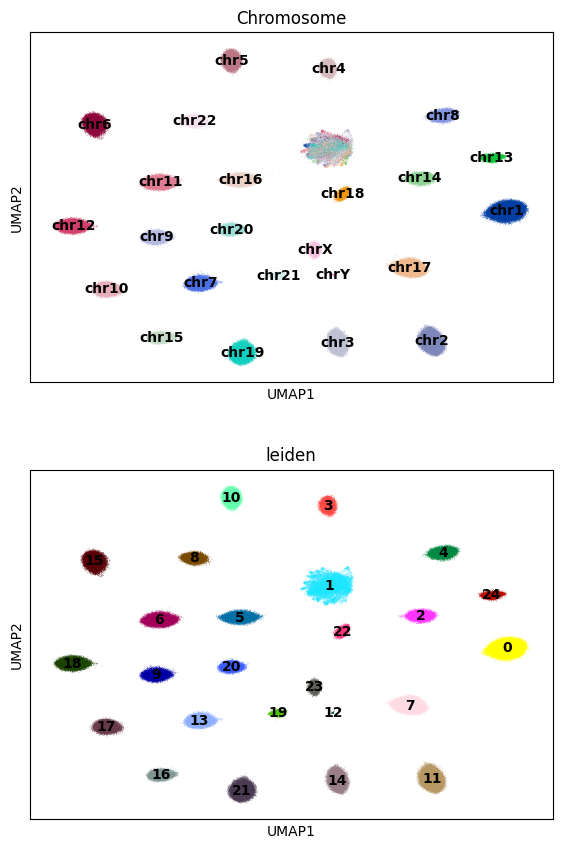

In [14]:
sc.pl.umap(
    adata_peaks,
    color=["Chromosome", "leiden"],
    ncols=1,
    legend_loc="on data"
)

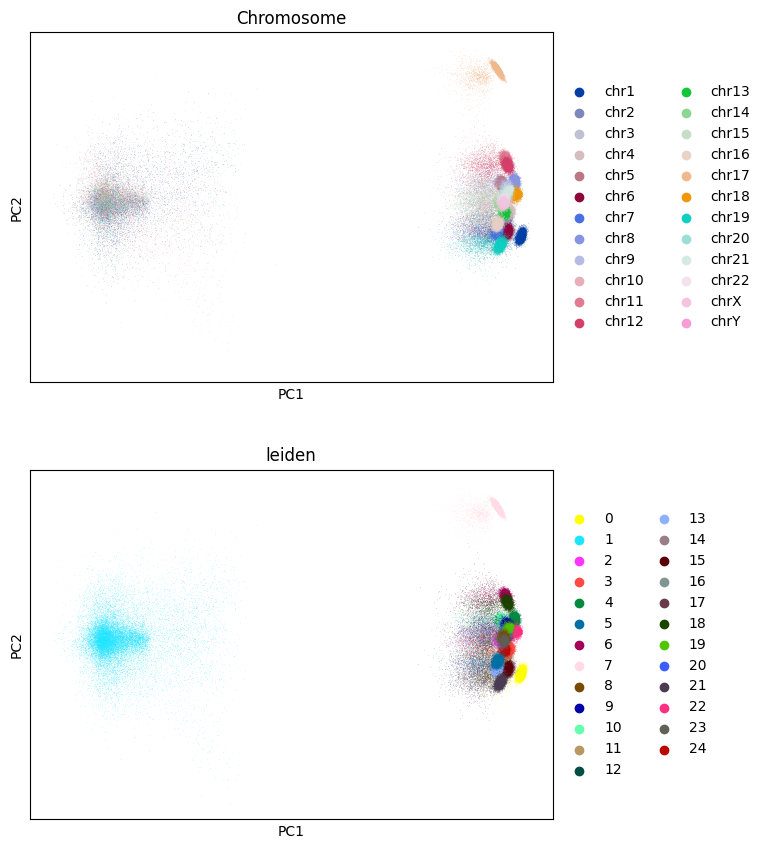

In [15]:
adata_peaks.obsm["X_pca"] = sc.pp.pca(embedding, n_comps=30)
sc.pl.pca(adata_peaks, color=["Chromosome", "leiden"], ncols=1)

In [16]:
adata_peaks.obs.leiden.value_counts()

leiden
0     24174
1     18667
11    17420
7     16562
21    16405
15    13657
14    13634
6     13382
18    12731
13    11389
5     11282
10    10792
17    10591
9     10057
4      8985
2      8709
20     7756
16     7742
3      7695
8      7462
23     4571
24     4441
22     3730
19     2916
12      166
Name: count, dtype: int64

In [18]:
assigned_peaks = adata_peaks.obs_names[adata_peaks.obs["leiden"] != "1"]
assigned_peaks

Index(['chr1:837562-838062', 'chr1:875071-875571', 'chr1:897402-897902',
       'chr1:907342-907842', 'chr1:929047-929547', 'chr1:931595-932095',
       'chr1:932355-932855', 'chr1:932869-933369', 'chr1:948772-949272',
       'chr1:954844-955344',
       ...
       'chrY:19566538-19567038', 'chrY:13752750-13753250',
       'chrY:13361667-13362167', 'chrY:7276179-7276679',
       'chrY:12922723-12923223', 'chrY:12925331-12925831',
       'chrY:12910495-12910995', 'chrY:12926998-12927498',
       'chrY:12908788-12909288', 'chrY:12924349-12924849'],
      dtype='object', name='RegionIDs', length=246249)

In [23]:
adata_peaks_subset = adata_peaks[assigned_peaks, :]
adata_peaks_subset

View of AnnData object with n_obs × n_vars = 246249 × 10126
    obs: 'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc', 'n_cells_per_feature', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'leiden'
    var: 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc', 'sample_id', 'barcode_rank', 'total_fragments_count', 'log10_total_fragments_count', 'unique_fragments_count', 'log10_unique_fragments_count', 'total_fragments_in_peaks_count', 'log10_total_fragments_in_peaks_count', 'unique_fragments_in_peaks_count', 'log10_unique_fragments_in_peaks_count', 'fraction_of_fragments_in_peaks', 'duplication_count', 'duplication_ratio', 'nucleosome_signal', 'tss_enrichment', 'pdf_values_for_tss_enrichment', 'pdf_values_for_fraction_of_fragments_in_peaks', 'pdf_values_for_duplication_ratio', 'barcode', 'n_features_per_cell', 'total_fragment_counts', 'leiden'
    uns: 'Chromosome_colors',

In [20]:
adata_subset = adata[:, assigned_peaks]
adata_subset

View of AnnData object with n_obs × n_vars = 10126 × 246249
    obs: 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc', 'sample_id', 'barcode_rank', 'total_fragments_count', 'log10_total_fragments_count', 'unique_fragments_count', 'log10_unique_fragments_count', 'total_fragments_in_peaks_count', 'log10_total_fragments_in_peaks_count', 'unique_fragments_in_peaks_count', 'log10_unique_fragments_in_peaks_count', 'fraction_of_fragments_in_peaks', 'duplication_count', 'duplication_ratio', 'nucleosome_signal', 'tss_enrichment', 'pdf_values_for_tss_enrichment', 'pdf_values_for_fraction_of_fragments_in_peaks', 'pdf_values_for_duplication_ratio', 'barcode', 'n_features_per_cell', 'total_fragment_counts', 'leiden'
    var: 'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc', 'n_cells_per_feature', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'leiden', 'leiden_colors', 'ls

In [26]:
adata_subset.obsm["peak2vec"] = adata_subset.X @ adata_peaks_subset.obsm["peak2vec"]
adata_subset.obsm["peak2vec"] = adata_subset.obsm["peak2vec"] / (np.linalg.norm(adata_subset.obsm["peak2vec"], axis=1, keepdims=True) + 1e-8)
# Find neighbors
sc.pp.neighbors(adata_subset, use_rep="peak2vec", n_neighbors=15, n_pcs=30)

# Calculate UMAP
sc.tl.umap(adata_subset, random_state=4)

C:\Users\claptar\AppData\Local\Temp\ipykernel_39608\2029623612.py:1: ImplicitModificationWarning: Setting element `.obsm['peak2vec']` of view, initializing view as actual.
  adata_subset.obsm["peak2vec"] = adata_subset.X @ adata_peaks_subset.obsm["peak2vec"]


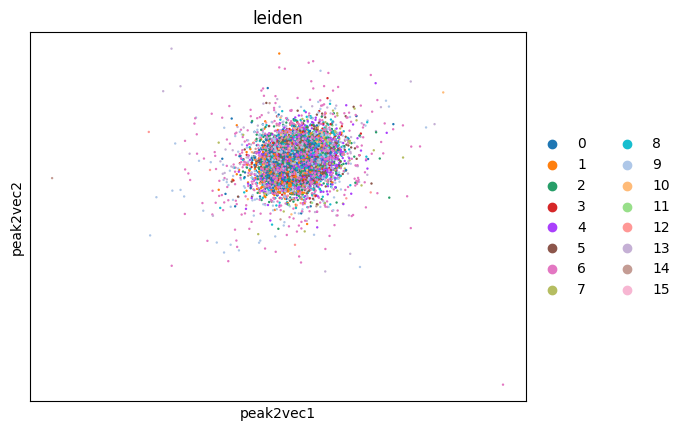

In [27]:
sc.pl.embedding(adata_subset, basis="peak2vec", color=["leiden"])

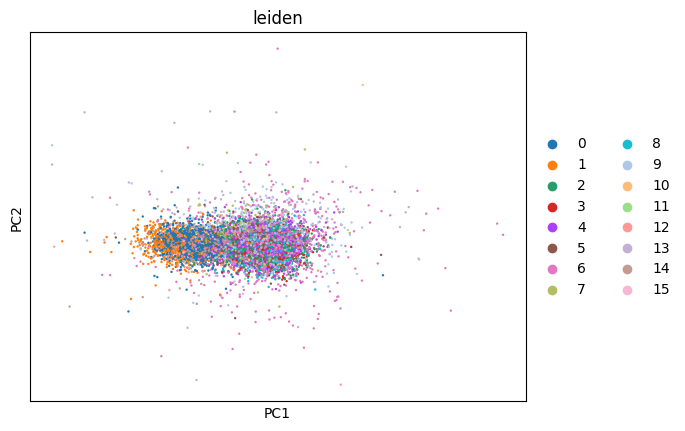

In [31]:
adata_subset.obsm["X_pca"] = sc.pp.pca(adata_subset.obsm["peak2vec"], n_comps=30)
sc.pl.pca(adata_subset, color=["leiden"], ncols=1)

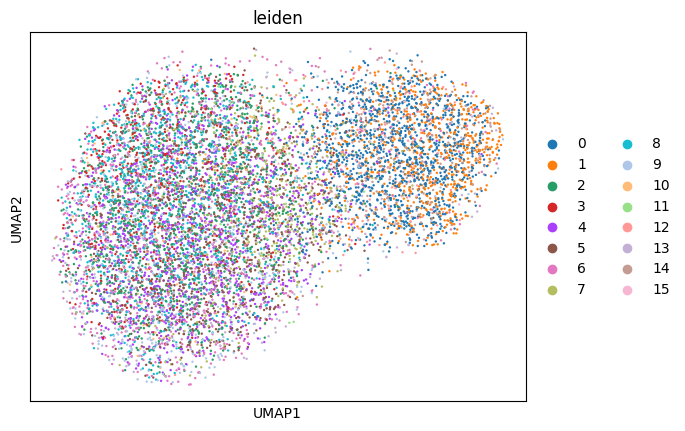

In [29]:
sc.pl.umap(adata_subset, color=["leiden"])

In [36]:
row_counts = (adata_subset.layers["binary"] > 0).sum(axis=1).A1
Z = (adata_subset.layers["binary"] @ adata_peaks_subset.obsm["peak2vec"]) / (row_counts[:, None] + 1e-12)
Z = Z / (np.linalg.norm(Z, axis=1, keepdims=True) + 1e-8)

In [41]:
adata_subset.obsm["peak2vec"] = Z
# Find neighbors
sc.pp.neighbors(adata_subset, use_rep="peak2vec", n_neighbors=15, n_pcs=30)

# Calculate UMAP
sc.tl.umap(adata_subset, random_state=4)

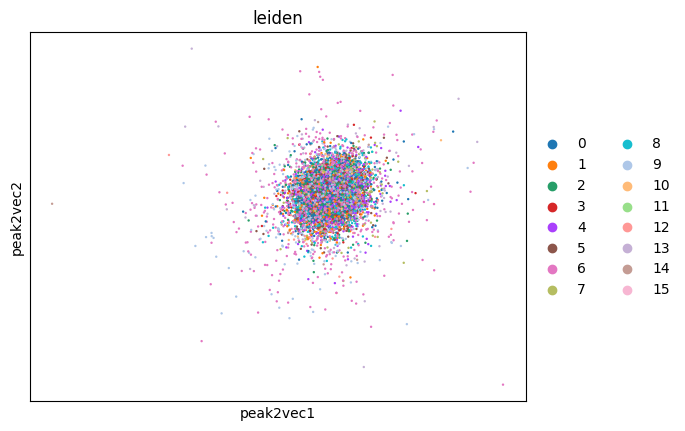

In [38]:
sc.pl.embedding(adata_subset, basis="peak2vec", color=["leiden"])

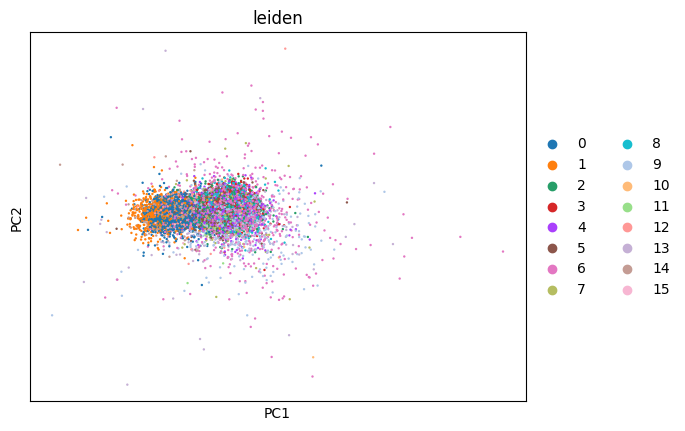

In [39]:
adata_subset.obsm["X_pca"] = sc.pp.pca(adata_subset.obsm["peak2vec"], n_comps=30)
sc.pl.pca(adata_subset, color=["leiden"], ncols=1)

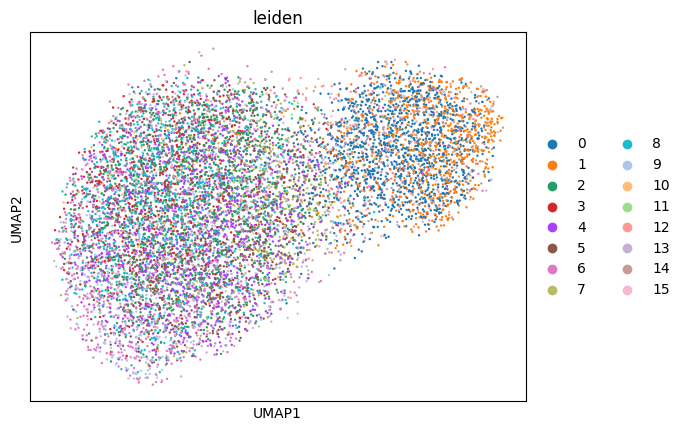

In [40]:
sc.pl.umap(adata_subset, color=["leiden"])

In [42]:
N, V = adata_subset.layers["binary"].shape
df = (adata_subset.layers["binary"] > 0).sum(axis=0).A1
idf = np.log((N - df + 0.5) / (df + 0.5))                        # [V]

len_r = adata_subset.layers["binary"].sum(axis=1).A1
avg_len = len_r.mean()
k, b = 1.2, 0.75

# build BM25 weights per nonzero: w = idf * (tf*(k+1)) / (tf + k*(1-b + b*len/avg_len))
X = adata_subset.layers["binary"].tocsr(copy=True).astype(np.float32)
rows = np.repeat(np.arange(N), np.diff(X.indptr))
tf = X.data
norm = tf + k*(1 - b + b*len_r[rows]/(avg_len+1e-12))
X.data = idf[X.indices] * (tf * (k+1)) / (norm + 1e-12)

Z = (X @ adata_peaks_subset.obsm["peak2vec"])
Z = Z / (np.linalg.norm(Z, axis=1, keepdims=True) + 1e-8)

In [43]:
adata_subset.obsm["peak2vec3"] = Z
# Find neighbors
sc.pp.neighbors(adata_subset, use_rep="peak2vec3", n_neighbors=15, n_pcs=30)

# Calculate UMAP
sc.tl.umap(adata_subset, random_state=4)

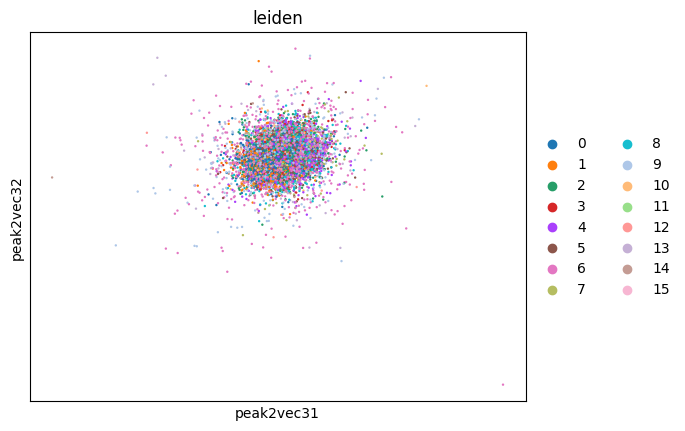

In [44]:
sc.pl.embedding(adata_subset, basis="peak2vec3", color=["leiden"])

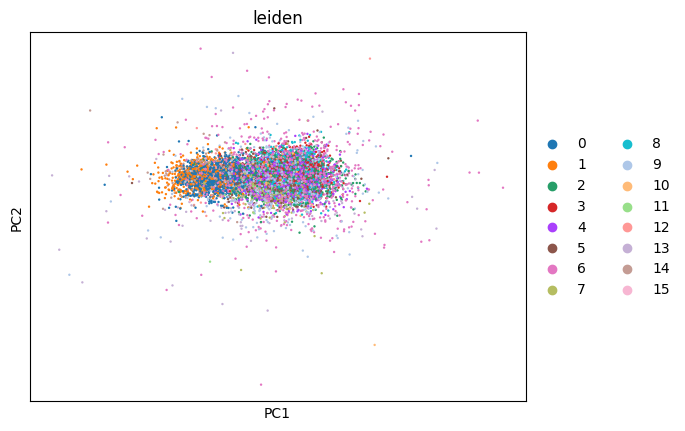

In [45]:
adata_subset.obsm["X_pca"] = sc.pp.pca(adata_subset.obsm["peak2vec3"], n_comps=30)
sc.pl.pca(adata_subset, color=["leiden"], ncols=1)

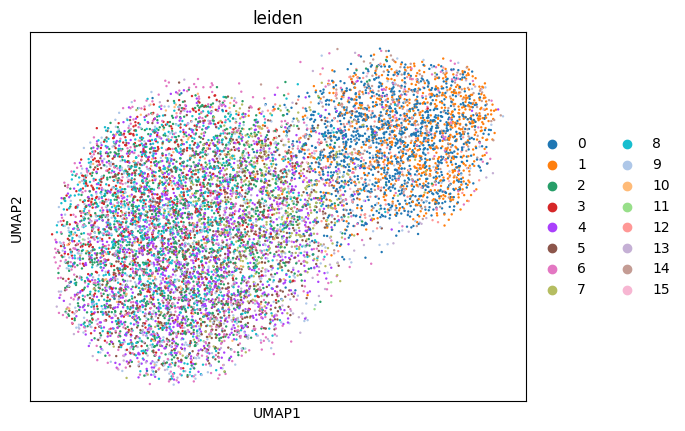

In [46]:
sc.pl.umap(adata_subset, color=["leiden"])